In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intern-data-ikarus/intern_data_ikarus.csv


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset you provided
file_path = '/kaggle/input/intern-data-ikarus/intern_data_ikarus.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

                                               title            brand  \
0  GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...           GOYMFK   
1  subrtex Leather ding Room, Dining Chairs Set o...          subrtex   
2  Plant Repotting Mat MUYETOL Waterproof Transpl...          MUYETOL   
3  Pickleball Doormat, Welcome Doormat Absorbent ...          VEWETOL   
4  JOIN IRON Foldable TV Trays for Eating Set of ...  JOIN IRON Store   

                                         description   price  \
0  multiple shoes, coats, hats, and other items E...  $24.99   
1                     subrtex Dining chairs Set of 2     NaN   
2                                                NaN   $5.98   
3  The decorative doormat features a subtle textu...  $13.99   
4  Set of Four Folding Trays With Matching Storag...  $89.99   

                                          categories  \
0  ['Home & Kitchen', 'Storage & Organization', '...   
1  ['Home & Kitchen', 'Furniture', 'Dining Room F...   
2  ['Pat

In [10]:
# Get the dimensions of the dataset
print(f"Dataset shape: {df.shape}")

# Get a summary of the dataset
print("\nDataset Info:")
df.info()

# Get statistical summary for numerical columns
print("\nStatistical Summary:")
print(df.describe())

Dataset shape: (312, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               312 non-null    object
 1   brand               312 non-null    object
 2   description         159 non-null    object
 3   price               215 non-null    object
 4   categories          312 non-null    object
 5   images              312 non-null    object
 6   manufacturer        205 non-null    object
 7   package_dimensions  306 non-null    object
 8   country_of_origin   125 non-null    object
 9   material            218 non-null    object
 10  color               265 non-null    object
 11  uniq_id             312 non-null    object
dtypes: object(12)
memory usage: 29.4+ KB

Statistical Summary:
                                                    title  \
count                                                 312 

In [11]:
# Check for duplicates based on the unique identifier, Remove duplicate rows, keeping the first instance
duplicate_rows = df[df.duplicated(subset='uniq_id', keep=False)]
print(f"Found {duplicate_rows.shape} duplicate rows.")

df.drop_duplicates(subset='uniq_id', keep='first', inplace=True)

print(f"New dataset shape after removing duplicates: {df.shape}")# Verify the change

Found (14, 12) duplicate rows.
New dataset shape after removing duplicates: (305, 12)


In [12]:
# Remove the '$' symbol and convert the 'price' column to a float
df['price'] = pd.to_numeric(df['price'].replace({'\$': ''}, regex=True), errors='coerce')

print("\nData type of 'price' column after conversion:")
print(df['price'].dtype)


Data type of 'price' column after conversion:
float64


In [13]:
# Drop rows where 'price' is missing
df.dropna(subset=['price'], inplace=True)

# Fill missing 'description' values with the content from the 'title' column
df['description'].fillna(df['title'], inplace=True)

/tmp/ipykernel_37/1393015730.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna(df['title'], inplace=True)


In [14]:
# List of columns to fill with an empty string
columns_to_fill = ['manufacturer', 'package_dimensions', 'country_of_origin', 'material', 'color']

for col in columns_to_fill:
    df[col].fillna('', inplace=True)

/tmp/ipykernel_37/437835416.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('', inplace=True)


In [15]:
# Final check for missing values
print("\nMissing values per column after cleaning:")
print(df.isnull().sum())

# Final check on data types and non-null counts
print("\nFinal Dataset Info:")
df.info()


Missing values per column after cleaning:
title                 0
brand                 0
description           0
price                 0
categories            0
images                0
manufacturer          0
package_dimensions    0
country_of_origin     0
material              0
color                 0
uniq_id               0
dtype: int64

Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 310
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               210 non-null    object 
 1   brand               210 non-null    object 
 2   description         210 non-null    object 
 3   price               210 non-null    float64
 4   categories          210 non-null    object 
 5   images              210 non-null    object 
 6   manufacturer        210 non-null    object 
 7   package_dimensions  210 non-null    object 
 8   country_of_origin   210 non-null    obje

Duplicate Products: Our initial analysis found several products listed more than once. These duplicates don't provide any new information for the model to learn from; in fact, they can skew the results, making the model biased towards those repeated items. By removing them, we ensure every entry is unique and valuable.

Products Without a Price: We removed about a third of the original entries because they were missing a price. For a real-world recommendation app, suggesting a product without telling the user its price makes for a poor experience. More importantly, these incomplete records are not useful for training our model, as they lack a key piece of information.

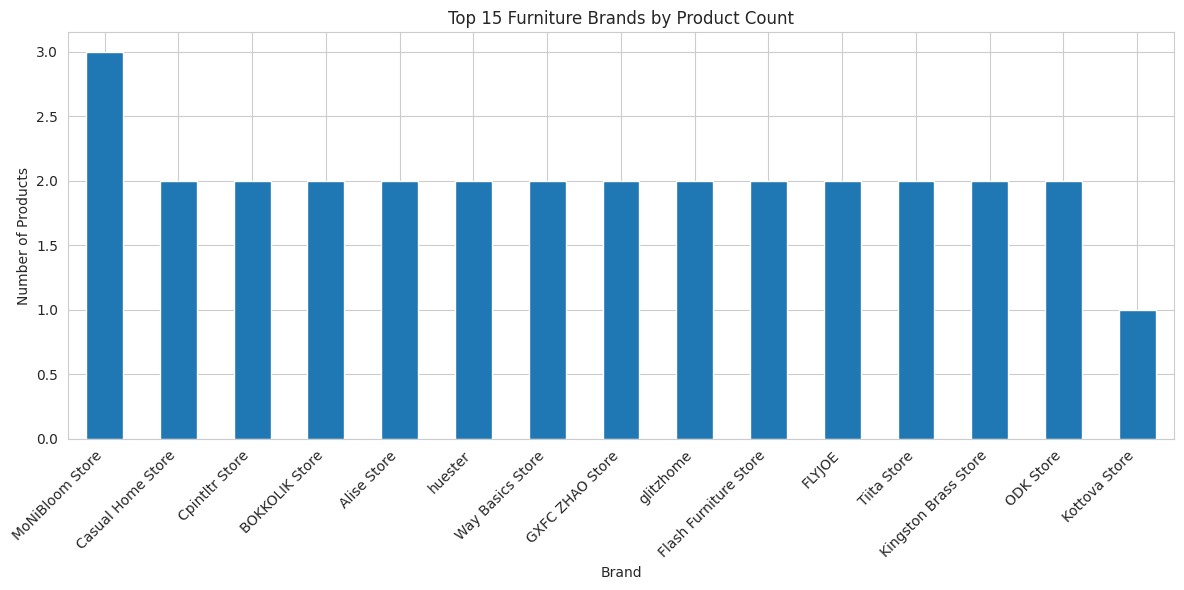

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


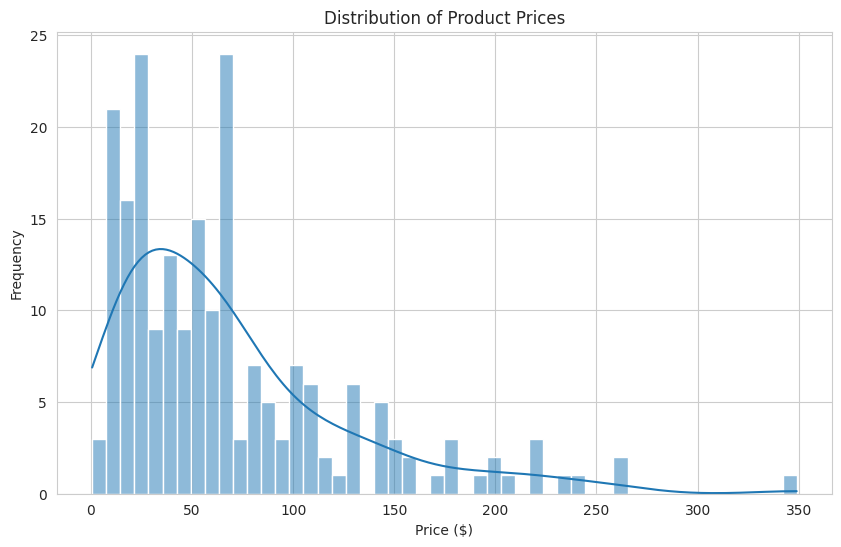

In [16]:
# Set plot style
sns.set_style("whitegrid")

# Plot distribution of the 'brand' column (top 15 brands)
plt.figure(figsize=(12, 6))
df['brand'].value_counts().nlargest(15).plot(kind='bar')
plt.title('Top 15 Furniture Brands by Product Count')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot distribution of 'price'
# First, handle potential non-numeric price values (e.g., '$19.99')

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = 'cleaned_intern_data.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data successfully saved to {cleaned_file_path}")

Cleaned data successfully saved to cleaned_intern_data.csv
